<a href="https://colab.research.google.com/github/Raries16/Under-Over-Sampling/blob/main/Under_Over_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


CHeck SMOTE code somewhere else
Undersamplg as well 
Rename the variables according to my need
Commenting and Upload on GIT

In [71]:
%cd /content/gdrive/My Drive/Competition/Cogentix/

/content/gdrive/My Drive/Competition/Cogentix


In [72]:
%ls

 Log_ROC.png             'Test data.csv'      'Under Over Sampling.ipynb'
 Problem_Statement.docx  'Training data.csv'


In [4]:
#importing Necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
df = pd.read_csv('Training data.csv')

In [6]:
df.head()

,player_id,sessions,session_time,words,rounds_completed,stars_gained,energy_spent,energy_left,win_ratio,total_games,friends,grind_spent,grind_earned,premium_left,premium_earned,premium_spent,lottery_wins,diffuculty,grind_left,level,dollars,playeractivity
0,8250900,4,3,1,0,115,811,1500,0,0,0,0,0,0,1,1,0,0,0,2,9,Churned
1,7271390,0,3,1,0,0,1271,400,0,0,0,0,0,0,1,1,1,0,0,1,4,Churned
2,3271250,3,10,1,0,1500,5027,0,0,0,0,5,0,0,2,1,1,0,0,14,4,Churned
3,728758,1,11,0,6000,10000,13061,7000,0,0,0,0,0,0,0,0,0,1,0,12,7,Churned
4,5732530,3,14,1,300,0,201545,400,0,0,0,5,0,0,2,1,0,0,0,23,22,Churned


In [7]:
df.columns

Index(['player_id', ' sessions', ' session_time', ' words',
       ' rounds_completed', ' stars_gained', ' energy_spent', ' energy_left',
       ' win_ratio', ' total_games', ' friends', ' grind_spent',
       ' grind_earned', ' premium_left', ' premium_earned', ' premium_spent',
       ' lottery_wins', ' diffuculty', ' grind_left', ' level', ' dollars',
       ' playeractivity'],
      dtype='object')

In [8]:
df.dtypes

player_id             int64
 sessions             int64
 session_time         int64
 words                int64
 rounds_completed     int64
 stars_gained         int64
 energy_spent         int64
 energy_left          int64
 win_ratio            int64
 total_games          int64
 friends              int64
 grind_spent          int64
 grind_earned         int64
 premium_left         int64
 premium_earned       int64
 premium_spent        int64
 lottery_wins         int64
 diffuculty           int64
 grind_left           int64
 level                int64
 dollars              int64
 playeractivity      object
dtype: object

In [9]:
df.isna().sum()

player_id            0
 sessions            0
 session_time        0
 words               0
 rounds_completed    0
 stars_gained        0
 energy_spent        0
 energy_left         0
 win_ratio           0
 total_games         0
 friends             0
 grind_spent         0
 grind_earned        0
 premium_left        0
 premium_earned      0
 premium_spent       0
 lottery_wins        0
 diffuculty          0
 grind_left          0
 level               0
 dollars             0
 playeractivity      0
dtype: int64

In [10]:
df = df.rename(columns=lambda x: x.strip())

In [11]:
df.playeractivity.value_counts()

Active     12079
Churned     2919
Name: playeractivity, dtype: int64

In [12]:
df['playeractivity'] = df['playeractivity'].replace({'Churned' : 0 , 'Active' : 1})
df.head()

,player_id,sessions,session_time,words,rounds_completed,stars_gained,energy_spent,energy_left,win_ratio,total_games,friends,grind_spent,grind_earned,premium_left,premium_earned,premium_spent,lottery_wins,diffuculty,grind_left,level,dollars,playeractivity
0,8250900,4,3,1,0,115,811,1500,0,0,0,0,0,0,1,1,0,0,0,2,9,0
1,7271390,0,3,1,0,0,1271,400,0,0,0,0,0,0,1,1,1,0,0,1,4,0
2,3271250,3,10,1,0,1500,5027,0,0,0,0,5,0,0,2,1,1,0,0,14,4,0
3,728758,1,11,0,6000,10000,13061,7000,0,0,0,0,0,0,0,0,0,1,0,12,7,0
4,5732530,3,14,1,300,0,201545,400,0,0,0,5,0,0,2,1,0,0,0,23,22,0


In [13]:
df['playeractivity'] = df['playeractivity'].astype(int)

In [14]:
df.dtypes

player_id           int64
sessions            int64
session_time        int64
words               int64
rounds_completed    int64
stars_gained        int64
energy_spent        int64
energy_left         int64
win_ratio           int64
total_games         int64
friends             int64
grind_spent         int64
grind_earned        int64
premium_left        int64
premium_earned      int64
premium_spent       int64
lottery_wins        int64
diffuculty          int64
grind_left          int64
level               int64
dollars             int64
playeractivity      int64
dtype: object

In [15]:
X = df.drop(['player_id' , 'playeractivity'], axis = 1)
X.head()

,sessions,session_time,words,rounds_completed,stars_gained,energy_spent,energy_left,win_ratio,total_games,friends,grind_spent,grind_earned,premium_left,premium_earned,premium_spent,lottery_wins,diffuculty,grind_left,level,dollars
0,4,3,1,0,115,811,1500,0,0,0,0,0,0,1,1,0,0,0,2,9
1,0,3,1,0,0,1271,400,0,0,0,0,0,0,1,1,1,0,0,1,4
2,3,10,1,0,1500,5027,0,0,0,0,5,0,0,2,1,1,0,0,14,4
3,1,11,0,6000,10000,13061,7000,0,0,0,0,0,0,0,0,0,1,0,12,7
4,3,14,1,300,0,201545,400,0,0,0,5,0,0,2,1,0,0,0,23,22


In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X[X.columns] = scaler.fit_transform(X)

In [19]:
Y = df['playeractivity']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: playeractivity, dtype: int64

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.30, 
                                                    random_state=42)

1    12079
0     2919
Name: playeractivity, dtype: int64


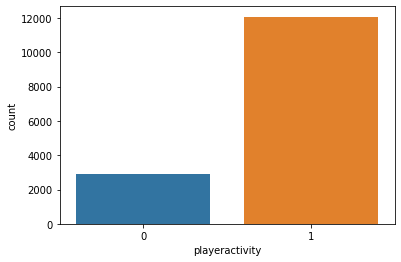

In [21]:
ax = sns.countplot(x=Y, data=df)
print(Y.value_counts())

In [22]:
100* (2919/float(df.shape[0]))

19.462595012668356

In [23]:
100* (12079/float(df.shape[0]))

80.53740498733164

In [24]:
Y_train.value_counts()

1    8500
0    1998
Name: playeractivity, dtype: int64

In [25]:
Y_train.head()

5896     1
13109    1
1572     1
12993    1
879      1
Name: playeractivity, dtype: int64

In [26]:
model_lr = LogisticRegression(solver = 'liblinear')
model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
predicted_classes_lr = model_lr.predict(X_test)
predicted_classes_lr

array([1, 1, 1, ..., 1, 1, 1])

In [28]:
print("Confusion matrix for Logistic Regression model:")
conf_mat_lr = confusion_matrix(Y_test.tolist(), predicted_classes_lr)
print(conf_mat_lr)

Confusion matrix for Logistic Regression model:
[[   0  921]
 [   0 3579]]


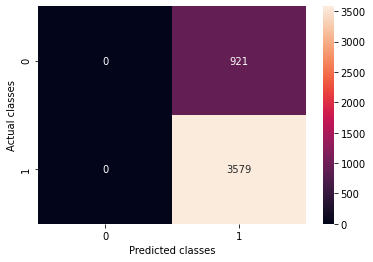

In [29]:
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

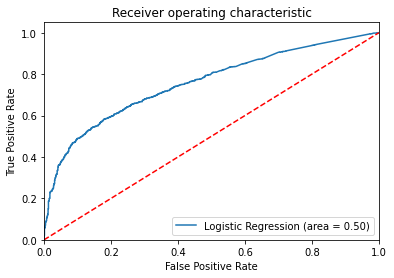

In [30]:
logit_roc_auc = roc_auc_score(Y_test, model_lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model_lr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# class_weight='balanced'

In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [32]:
unique_classes = list(Y.unique())
unique_classes

[0, 1]

In [33]:
out_dict = {}
for classes in unique_classes:
    out_dict[classes] = df.shape[0]/((df.loc[Y == classes].shape[0])
                                     *len(unique_classes))

In [34]:
out_dict

{0: 2.5690304898937995, 1: 0.6208295388691116}

In [35]:
print (X_train.shape, Y_train.shape)

(10498, 20) (10498,)


In [36]:
model_lr = LogisticRegression(class_weight='balanced' , solver = 'liblinear').fit(X_train, Y_train)

In [37]:
from sklearn.utils import class_weight

In [38]:
class_weight.compute_class_weight('balanced', np.unique(Y_train), Y_train)

array([2.62712713, 0.61752941])

In [39]:
predicted_classes_lr = model_lr.predict(X_test)

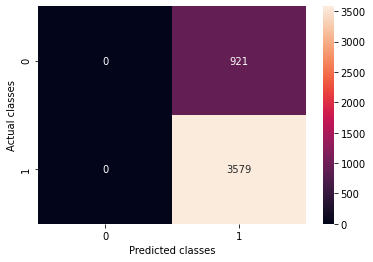

In [40]:
sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
model_lr = LogisticRegression(max_iter= 400)

In [43]:
weights = np.linspace(0.05, 0.95, 20)
grid_values = {'class_weight': [{0: x, 1: 1.0-x} for x in weights] , 'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf = GridSearchCV(model_lr, param_grid = grid_values,scoring = 'f1')
grid_clf.fit(X_train, Y_train)
print("Best parameters : %s" % grid_clf.best_params_)

Best parameters : {'C': 25, 'class_weight': {0: 0.5710526315789474, 1: 0.42894736842105263}}


In [44]:
best_grid=grid_clf.best_estimator_

In [45]:
predicted_classes_best_grid = best_grid.predict(X_test)
predicted_classes_best_grid

array([1, 1, 1, ..., 1, 1, 1])

In [46]:
print("Confusion matrix for Logistic Regression model:")
conf_mat_best_grid = confusion_matrix(Y_test.tolist(), predicted_classes_best_grid)
print(conf_mat_best_grid)

Confusion matrix for Logistic Regression model:
[[   8  913]
 [   6 3573]]


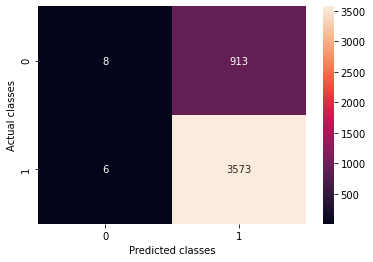

In [47]:
sns.heatmap(conf_mat_best_grid, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

# SMOTE

In [48]:
unique, count = np.unique(Y_train, return_counts=True)
Y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
Y_train_dict_value_count

{0: 1998, 1: 8500}

In [49]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [50]:
unique, count = np.unique(y_train_res, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 8500, 1: 8500}

In [51]:
model_lr = LogisticRegression(solver = 'liblinear' , max_iter = 1000).fit(x_train_res, y_train_res)

In [52]:
predicted_classes_lr = model_lr.predict(X_test)

Confusion matrix for Logistic Regression model:
[[ 779  142]
 [1538 2041]]


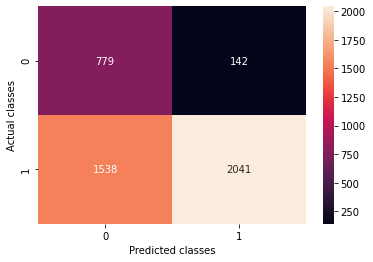

In [53]:
print("Confusion matrix for Logistic Regression model:")
conf_mat_lr = confusion_matrix(Y_test.tolist(), predicted_classes_lr)
print(conf_mat_lr)


sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

In [54]:
weights = np.linspace(0.005, 0.25, 10)
weights

array([0.005     , 0.03222222, 0.05944444, 0.08666667, 0.11388889,
       0.14111111, 0.16833333, 0.19555556, 0.22277778, 0.25      ])

In [55]:
model_lr = LogisticRegression(max_iter = 400)

In [56]:
grid_values = {'class_weight': [{0: x, 1: 1.0-x} for x in weights] , 'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf = GridSearchCV(model_lr, param_grid = grid_values,scoring = 'f1')
grid_clf.fit(x_train_res, y_train_res)
print("Best parameters : %s" % grid_clf.best_params_)

Best parameters : {'C': 25, 'class_weight': {0: 0.25, 1: 0.75}}


In [57]:
best_grid=grid_clf.best_estimator_

In [58]:
predicted_classes_best_grid = best_grid.predict(X_test)
predicted_classes_best_grid

array([1, 1, 1, ..., 1, 1, 1])

Confusion matrix for Logistic Regression model:
[[  23  898]
 [  16 3563]]


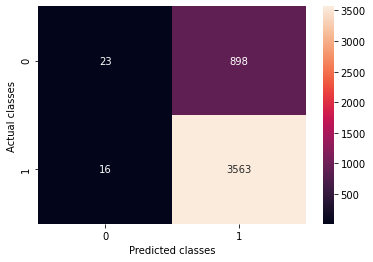

In [59]:
print("Confusion matrix for Logistic Regression model:")
conf_mat_best_grid = confusion_matrix(Y_test.tolist(), predicted_classes_best_grid)
print(conf_mat_best_grid)


sns.heatmap(conf_mat_best_grid, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()

# UNDERSAMPLING

In [60]:
minority_class_len = len(df[df['playeractivity'] == 0])
print(minority_class_len)

2919


In [61]:
majority_class_indices = df[df['playeractivity'] == 1].index
print(majority_class_indices)

Int64Index([   30,    60,    61,    65,    68,    69,    70,    71,    73,
               76,
            ...
            14987, 14988, 14989, 14990, 14992, 14993, 14994, 14995, 14996,
            14997],
           dtype='int64', length=12079)


In [62]:
random_majority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len, 
                                           replace=False)
print(len(random_majority_indices))

2919


In [63]:
minority_class_indices = df[df['playeractivity'] == 0].index
print(minority_class_indices)

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14926, 14930, 14933, 14935, 14939, 14945, 14949, 14971, 14984,
            14991],
           dtype='int64', length=2919)


In [64]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [65]:
under_sample = df.loc[under_sample_indices]

In [66]:
under_sample.head()

,player_id,sessions,session_time,words,rounds_completed,stars_gained,energy_spent,energy_left,win_ratio,total_games,friends,grind_spent,grind_earned,premium_left,premium_earned,premium_spent,lottery_wins,diffuculty,grind_left,level,dollars,playeractivity
0,8250900,4,3,1,0,115,811,1500,0,0,0,0,0,0,1,1,0,0,0,2,9,0
1,7271390,0,3,1,0,0,1271,400,0,0,0,0,0,0,1,1,1,0,0,1,4,0
2,3271250,3,10,1,0,1500,5027,0,0,0,0,5,0,0,2,1,1,0,0,14,4,0
3,728758,1,11,0,6000,10000,13061,7000,0,0,0,0,0,0,0,0,0,1,0,12,7,0
4,5732530,3,14,1,300,0,201545,400,0,0,0,5,0,0,2,1,0,0,0,23,22,0


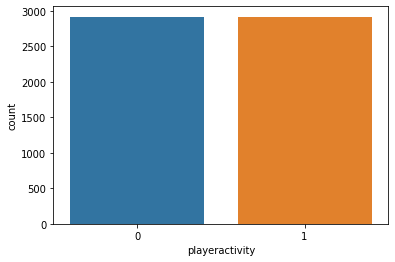

In [67]:
sns.countplot(x=under_sample['playeractivity'], data=under_sample)

In [68]:
X = under_sample.drop(['playeractivity' , 'player_id'] , axis =1)
Y = under_sample['playeractivity']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
model_lr = LogisticRegression(max_iter = 400).fit(X_train, Y_train)
predicted_classes_lr = model_lr.predict(X_test)

Confusion matrix for Logistic Regression model:
[[  8 912]
 [  0 832]]


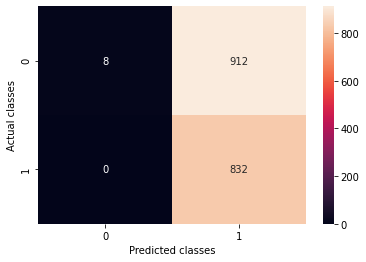

In [69]:
print("Confusion matrix for Logistic Regression model:")
conf_mat_lr = confusion_matrix(Y_test.tolist(), predicted_classes_lr)
print(conf_mat_lr)


sns.heatmap(conf_mat_lr, annot = True , fmt = 'g')
plt.xlabel("Predicted classes")
plt.ylabel("Actual classes")
plt.show()